In [1]:
%reload_ext autoreload
%autoreload 2
from experiments import experiment
from tqdm import tqdm
import numpy as np
from numpy.random import multinomial

In [2]:
distribution = [
    ## полная независимость
    [
        ([0, 0, 0], 0.125),
        ([0, 0, 1], 0.125),
        ([0, 1, 0], 0.125),
        ([0, 1, 1], 0.125),
        ([1, 0, 0], 0.125),
        ([1, 0, 1], 0.125),
        ([1, 1, 0], 0.125),
        ([1, 1, 1], 0.125)
    ],
    ## условная независимость
    [
        ([0, 0, 0], 0.15),
        ([0, 0, 1], 0.1),
        ([0, 1, 0], 0.3),
        ([0, 1, 1], 0.1),
        ([1, 0, 0], 0.05),  
        ([1, 0, 1], 0.1),
        ([1, 1, 0], 0.1),
        ([1, 1, 1], 0.1)
    ],
    ## полу-условная независимость
    [
        ([0, 0, 0], 0.15),
        ([0, 0, 1], 0.06),
        ([0, 1, 0], 0.3),
        ([0, 1, 1], 0.16),
        ([1, 0, 0], 0.05),  
        ([1, 0, 1], 0.08),
        ([1, 1, 0], 0.1),
        ([1, 1, 1], 0.1)
    ],
    ## пирсон 0, но гипотеза не верна
    [
        ([0, 0, 0], 0.15),
        ([0, 0, 1], 0.1),
        ([0, 1, 0], 0.1),
        ([0, 1, 1], 0.15),
        ([1, 0, 0], 0.1),  
        ([1, 0, 1], 0.15),
        ([1, 1, 0], 0.15),
        ([1, 1, 1], 0.1)
    ],
    ## гипотеза не верна, но верна Y,Z | X
    [
        ([0, 0, 0], 0.15),
        ([0, 0, 1], 0.05),
        ([0, 1, 0], 0.3),
        ([0, 1, 1], 0.1),
        ([1, 0, 0], 0.1),
        ([1, 0, 1], 0.1),
        ([1, 1, 0], 0.1),
        ([1, 1, 1], 0.1)
    ],
    ## произвольные вероятности
    [
        ([0, 0, 0], 0.03),
        ([0, 0, 1], 0.10),
        ([0, 1, 0], 0.04),
        ([0, 1, 1], 0.08),
        ([1, 0, 0], 0.30),
        ([1, 0, 1], 0.1),
        ([1, 1, 0], 0.07),
        ([1, 1, 1], 0.28)
    ],
    ## произвольные вероятности
    [
        ([0, 0, 0], 0.21),
        ([0, 0, 1], 0.12),
        ([0, 1, 0], 0.04),
        ([0, 1, 1], 0.34),
        ([1, 0, 0], 0.1),
        ([1, 0, 1], 0.12),
        ([1, 1, 0], 0.02),
        ([1, 1, 1], 0.05)
    ],
]

In [3]:
def get_score(dist):
  power_ump = []
  power_ump2 = []
  power_partial = []

  grid = [i for i in range(50,300+1, 10)]
  for n in tqdm(grid):
    while True:
      try:
        cur_ump, cur_ump2, cur_partial = experiment(dist, n, 100000, 0.05)
        power_ump.append(cur_ump)
        power_ump2.append(cur_ump2)
        power_partial.append(cur_partial)
        break
      except Exception:
        print('GG')
  return (power_ump, power_ump2, power_partial)

In [4]:
results = []
for dist in distribution:
    results.append(get_score(dist))

  0%|          | 0/26 [00:00<?, ?it/s]

100%|██████████| 26/26 [2:18:19<00:00, 319.22s/it]


In [5]:
# import pickle

# with open('data.pickle', 'wb') as f:
#     pickle.dump(results, f, pickle.HIGHEST_PROTOCOL)

In [2]:
import pickle

with open('data.pickle', 'rb') as f:
    results = pickle.load(f)

In [3]:
# def get_odd(x):
#     new_x=[]
#     for i in range(len(x)):
#         if i%2==0:
#             new_x.append(x[i])
#     return new_x
# power_ump = get_odd(power_ump)
# power_ump2 = get_odd(power_ump2)
# power_partial = get_odd(power_partial)
# grid = get_odd(grid)

In [5]:
power_ump, power_ump2, power_partial = results[0]

In [6]:
grid = [i for i in range(50,300+1, 10)]

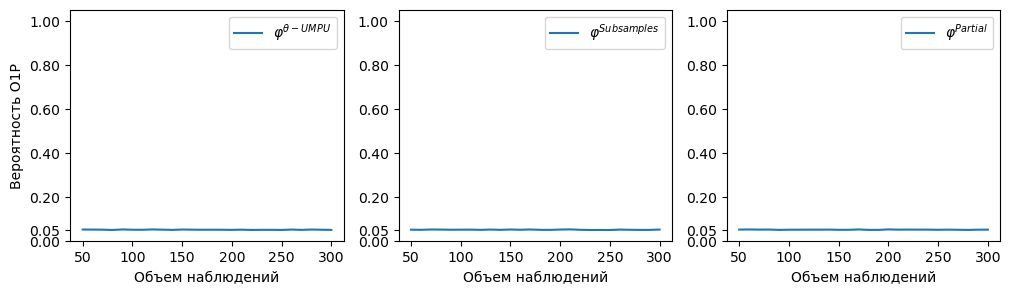

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
plt.ylim(0, 1.05)
plt.yticks([0,0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.plot(grid, power_ump, label='$\\varphi^{\\theta-UMPU}$')
plt.xlabel('Объем наблюдений')
plt.ylabel('Вероятность О1Р')
plt.legend()

plt.subplot(1,3,2)
plt.ylim(0, 1.05)
plt.yticks([0,0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.plot(grid, power_ump2, label='$\\varphi^{Subsamples}$')
plt.xlabel('Объем наблюдений')
plt.legend()

plt.subplot(1,3,3)
plt.ylim(0, 1.05)
plt.yticks([0,0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.plot(grid, power_partial, label='$\\varphi^{Partial}$')
plt.xlabel('Объем наблюдений')
plt.legend()


# plt.yticks([0.05, 0.2, 0.4, 0.6, 0.8])

plt.savefig('graph1.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

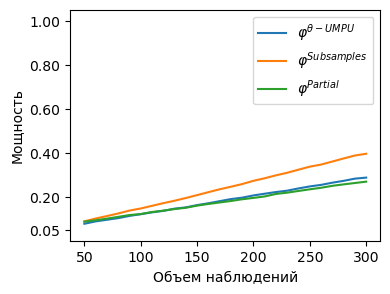

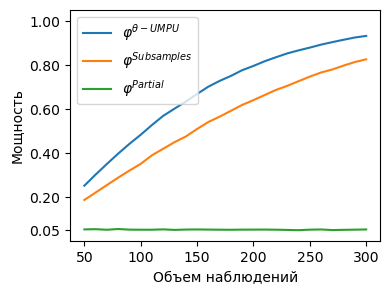

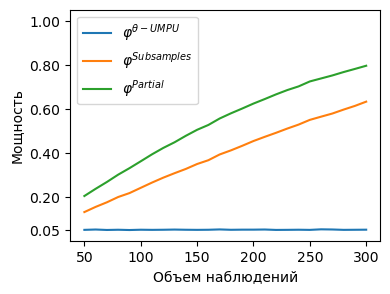

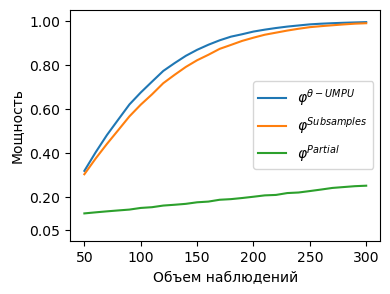

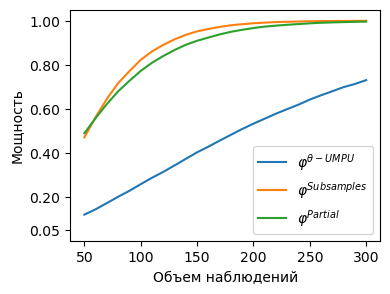

In [61]:
for i in range(2,7):
    power_ump, power_ump2, power_partial = results[i]

    plt.figure(figsize=(4,3))

    plt.plot(grid, power_ump, label='$\\varphi^{\\theta-UMPU}$')
    plt.plot(grid, power_ump2, label='$\\varphi^{Subsamples}$')
    plt.plot(grid, power_partial, label='$\\varphi^{Partial}$')

    plt.ylim(0, 1.05)
    plt.yticks([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xlabel('Объем наблюдений')
    plt.ylabel('Мощность')
    plt.legend()
    plt.savefig(f'graph{i+1}.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.show()